# Twitter US Airline Sentiment

## Data Description
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from
February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

## Dataset:
The project is from a dataset from Kaggle.

Link to the Kaggle project site: https://www.kaggle.com/crowdflower/twitter-airline-sentiment

The dataset has to be downloaded from the above Kaggle website.

The dataset has the following columns:
* tweet_id
* airline_sentiment
* airline_sentiment_confidence
* negativereason
* negativereason_confidence
* airline
* airline_sentiment_gold
* name
* negativereason_gold
* retweet_count
* text
* tweet_coord
* tweet_created
* tweet_location
* user_timezone

## Objective:
To implement the techniques learnt as a part of the course.

## Learning Outcomes:
* Basic understanding of text pre-processing.
* What to do after text pre-processing:
    * Bag of words
    * Tf-idf
* Build the classification model.
* Evaluate the Model.

### 1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)

In [75]:
#Import warnings
import warnings
warnings.filterwarnings('ignore')

In [76]:
# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\synap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\synap\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\synap\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [77]:
data = pd.read_csv('Tweets.csv')

### 2. Understand of data-columns: (5 Marks)
* Drop all other columns except “text” and “airline_sentiment”.
* Check the shape of data.
* Print first 5 rows of data

In [78]:
#Looking at the columns in the data
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [79]:
#Checking the shape of the data
data.shape

(14640, 15)

In [80]:
#Dropping all data columns expcept for 'text' and 'airline_sentiment'
data = data.drop(['tweet_id', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'], axis=1)

In [81]:
#Checking that the correct columns were dropped
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [82]:
#Shape of data after dropping columns
data.shape

(14640, 2)

In [83]:
data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [84]:
#Substitute 'airline_sentiment' values with numbers
data['airline_sentiment'] = data['airline_sentiment'].replace(['negative', 'neutral', 'positive'],['1', '2', '3'])
data.head()

,airline_sentiment,text
0,2,@VirginAmerica What @dhepburn said.
1,3,@VirginAmerica plus you've added commercials t...
2,2,@VirginAmerica I didn't today... Must mean I n...
3,1,@VirginAmerica it's really aggressive to blast...
4,1,@VirginAmerica and it's a really big bad thing...


In [85]:
data.head()

,airline_sentiment,text
0,2,@VirginAmerica What @dhepburn said.
1,3,@VirginAmerica plus you've added commercials t...
2,2,@VirginAmerica I didn't today... Must mean I n...
3,1,@VirginAmerica it's really aggressive to blast...
4,1,@VirginAmerica and it's a really big bad thing...


### 3. Text pre-processing: Data preparation. (20 Marks)
* Html tag removal.
* Tokenization.
* Remove the numbers.
* Removal of Special Characters and Punctuations.
* Conversion to lowercase.
* Lemmatize or stemming.
* Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)
* Print first 5 rows of data after pre-processing.

In [86]:
#Remove html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))
data.head()

,airline_sentiment,text
0,2,@VirginAmerica What @dhepburn said.
1,3,@VirginAmerica plus you've added commercials t...
2,2,@VirginAmerica I didn't today... Must mean I n...
3,1,@VirginAmerica it's really aggressive to blast...
4,1,@VirginAmerica and it's a really big bad thing...


In [87]:
#Replace contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))
data.head()

,airline_sentiment,text
0,2,@VirginAmerica What @dhepburn said.
1,3,@VirginAmerica plus you have added commercials...
2,2,@VirginAmerica I did not today... Must mean I ...
3,1,@VirginAmerica it is really aggressive to blas...
4,1,@VirginAmerica and it is a really big bad thin...


In [88]:
#Remove numbers
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data.head()

,airline_sentiment,text
0,2,@VirginAmerica What @dhepburn said.
1,3,@VirginAmerica plus you have added commercials...
2,2,@VirginAmerica I did not today... Must mean I ...
3,1,@VirginAmerica it is really aggressive to blas...
4,1,@VirginAmerica and it is a really big bad thin...


In [89]:
#Tokenization
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [90]:
#Checking the tokenization
data.head()

,airline_sentiment,text
0,2,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,3,"[@, VirginAmerica, plus, you, have, added, com..."
2,2,"[@, VirginAmerica, I, did, not, today, ..., Mu..."
3,1,"[@, VirginAmerica, it, is, really, aggressive,..."
4,1,"[@, VirginAmerica, and, it, is, a, really, big..."


In [91]:
stopwords = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

#Getting rid of any characters that are not recognized in ascii
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

#Converting all words to lowercase so as not to duplicate tokenized words
def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

#Removing punctuation
def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

#Removing stopwords. These are words that are frequent and don't add to sentiment analysis
def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

#Lemmatizing the words
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

#This function performs all of the previous functions to apply to the dataset at once
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)

#Printing the top 5 rows
data.head()

,airline_sentiment,text
0,2,virginamerica dhepburn say
1,3,virginamerica plus add commercials experience ...
2,2,virginamerica today must mean need take anothe...
3,1,virginamerica really aggressive blast obnoxiou...
4,1,virginamerica really big bad thing


### 4. Vectorization: (10 Marks)
* Use CountVectorizer.
* Use TfidfVectorizer.

In [92]:
#Using CountVectorizer to convert text data to numbers
from sklearn.feature_extraction.text import CountVectorizer

#Keep only 1000 features as number of features will increase the processing time
vectorizer = CountVectorizer(max_features=1000)
data_features_count = vectorizer.fit_transform(data['text'])

#Convert the data features to array
data_features_count = data_features_count.toarray()                        

In [93]:
#Checking the shape of the data after CountVectorizer
data_features_count.shape

(14640, 1000)

In [94]:
#Using TfidVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
data_features_tfid = vectorizer.fit_transform(data['text'])

data_features_tfid = data_features_tfid.toarray()

In [95]:
#Checking the shape of the data after TfidVectorizer
data_features_tfid.shape

(14640, 1000)

### 5. Fit and evaluate model using both type of vectorization. (6+6 Marks)

In [96]:
labels = data['airline_sentiment']
labels = labels.astype('int')

In [97]:
#Split the data into train and test for CountVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features_count, labels, test_size=0.3, random_state=42)

In [98]:
# Using Random Forest to build model for the classification of tweets
# Also calculating the cross validation score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features_count, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.6977459016393441


**Insights:** `Count Vectorizer cross validation score is 70%`

In [99]:
# Predict the result for test data using the model built above
result = forest.predict(X_test)

[[2439  268  107]
 [ 379  425   80]
 [ 180  113  401]]


<AxesSubplot:>

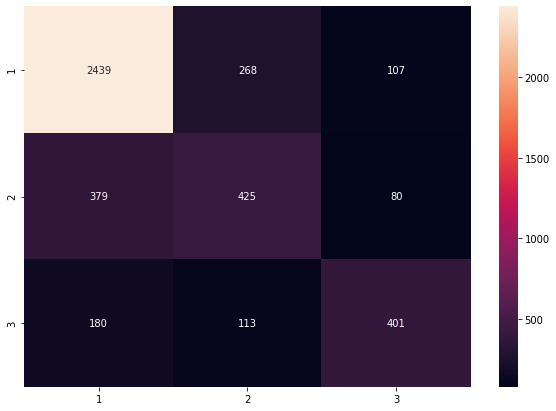

In [100]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

**Insights:** `It seems like the model did well at predicting which tweets had negative sentiment and for neutral sentiment the predicted and actual is almost split between negative and neutral prediction.`

In [101]:
#Split the data into train and test for TfidVectorizer
X_train, X_test, y_train, y_test = train_test_split(data_features_tfid, labels, test_size=0.3, random_state=42)

In [102]:
# Using Random Forest to build model for TfidVectorizer and calculating the cross validation score
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features_tfid, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7041666666666667


**Insights:** `Tfid Vectorizer cross validation score is 70% also but slightly higher than count vectorizer when not rounded up.`

In [103]:
# Predict the result for test data
result = forest.predict(X_test)

[[2586  162   66]
 [ 438  379   67]
 [ 223   95  376]]


<AxesSubplot:>

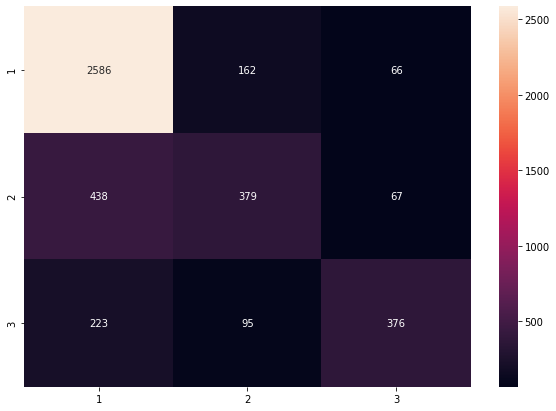

In [104]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes
conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

**Insights:** `For the Tfid Vectorization model, the predicted and actual values are very similar to the Count Vectorization model.`

### 6. Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your modelon this dataset. (8 Marks)

* Given data of tweets about a major U.S. airline, I first dropped all of the irrelevant columns to determine sentiment analysis.
* In data pre-processing, I removed symbols and characters to standardize the data
* Then I made all of the words lowercase so as not to create duplicates of words in the data when tokenizing
* I tokenized the data to seperate each word as its own
* The I completed further pre-processing of the individual words using lemmatization
* Next I applied CountVectorization and TfidVectorization to transform the data and prepare for an ML model
* Lastly, I used the RandomForestClassifier and analyzed its accuracy using the cross validation score and confusion matrix.